In [1]:
pwd

'/home/wsuser/work'

In [2]:
#IMPORTING THE REQUIRED LIBRARIES

import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [3]:
#LOADING THE DATA

(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#ANALYSING THE DATA

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

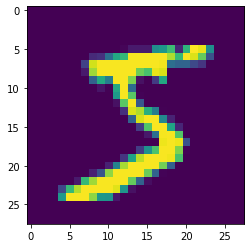

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [8]:
#RESHAPING THE DATA

x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [9]:
#ONE HOT ENCODING

number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
#ADDING CNN LAYERS

model=Sequential()
model.add(Conv2D(64,(3,3), input_shape=(28, 28, 1),activation='relu'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

In [12]:
#COMPILING THE MODEL

model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [13]:
#TRAINING THE MODEL

model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.2020 - accuracy: 0.9541 - val_loss: 0.1004 - val_accuracy: 0.9701
Epoch 2/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0674 - accuracy: 0.9791 - val_loss: 0.0950 - val_accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0900 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.1273 - val_accuracy: 0.9712
Epoch 5/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.1238 - val_accuracy: 0.9754


In [14]:
#OBSERVING THE METRICS

metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.12379206717014313, 0.9753999710083008]


In [15]:
#TESTING THE MODEL

prediction=model.predict(x_test[:4])
print(prediction)

[[3.28872908e-15 1.95779058e-23 8.82041959e-08 8.50590538e-07
  9.22660762e-21 6.43331284e-18 1.30050761e-24 9.99999046e-01
  2.46578826e-13 3.34640051e-14]
 [1.26362874e-12 2.11858395e-11 9.99996305e-01 3.83393729e-13
  5.48913603e-14 3.07190161e-20 3.74763135e-06 1.15749472e-18
  9.97166238e-12 2.33173223e-22]
 [5.01771624e-10 1.00000000e+00 9.39196099e-09 2.27867742e-11
  9.24437682e-09 8.38384501e-11 2.64628822e-11 1.16027105e-10
  1.56744289e-08 4.46482586e-13]
 [1.00000000e+00 1.79823523e-18 3.30162178e-12 2.28357816e-17
  2.39515358e-15 2.26071671e-14 6.06254935e-10 3.94686267e-15
  1.35645672e-12 1.39756415e-10]]


In [17]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
#OBSERVING THE METRICS

metrics=model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.12379206717014313, 0.9753999710083008]


In [19]:
#TEST THE MODEL

prediction=model.predict(x_test[:4])
print(prediction)

[[3.28872908e-15 1.95779058e-23 8.82041959e-08 8.50590538e-07
  9.22660762e-21 6.43331284e-18 1.30050761e-24 9.99999046e-01
  2.46578826e-13 3.34640051e-14]
 [1.26362874e-12 2.11858395e-11 9.99996305e-01 3.83393729e-13
  5.48913603e-14 3.07190161e-20 3.74763135e-06 1.15749472e-18
  9.97166238e-12 2.33173223e-22]
 [5.01771624e-10 1.00000000e+00 9.39196099e-09 2.27867742e-11
  9.24437682e-09 8.38384501e-11 2.64628822e-11 1.16027105e-10
  1.56744289e-08 4.46482586e-13]
 [1.00000000e+00 1.79823523e-18 3.30162178e-12 2.28357816e-17
  2.39515358e-15 2.26071671e-14 6.06254935e-10 3.94686267e-15
  1.35645672e-12 1.39756415e-10]]


In [20]:
#SAVE THE MODEL

model.save('models/mnistCNN.h5')

In [21]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XcqWPZiNGzCckOWp-3049w8G5AK4QZ_pbYBX-uO0D-H0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-jtt3nqyexqmzzr'
object_key = 'data.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [22]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [23]:
#TEST WITH THE SAVED MODEL

from tensorflow.keras.models import load_model
model=load_model('/home/wsuser/work/models/mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
  img= Image.open('data/' + str(index) + '.png').convert("L")
  img=img.resize((28,28))
  im2arr=np.array(img)
  im2arr=im2arr.reshape(1,28,28,1)
  y_pred=model.predict(im2arr)
  print(y_pred)

[[6.3146018e-07 1.1260749e-05 7.6615528e-05 2.7025220e-01 6.1885818e-05
  2.0567230e-05 2.1154392e-09 7.2903681e-01 1.1311022e-05 5.2876509e-04]]
[[2.1939385e-03 7.7776253e-02 2.2780478e-03 6.7312354e-01 2.2436732e-02
  1.3393445e-05 1.5612752e-08 2.6982451e-07 2.3475279e-04 2.2194311e-01]]
[[7.6746373e-03 5.0789211e-03 1.7024070e-02 9.0941799e-01 2.5145204e-03
  2.8386096e-02 1.9217285e-04 2.3009305e-05 1.4040446e-02 1.5648192e-02]]
[[2.9646584e-03 4.1382151e-05 7.6085336e-05 1.4104132e-01 5.7438695e-01
  1.4827483e-05 1.2172254e-06 1.1526548e-04 3.1215814e-06 2.8135514e-01]]


In [24]:
cd models

/home/wsuser/work/models


In [25]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [26]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 11.9 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"edrGseYo5NjLkLARQlN2Jvot9NHtDMBai9xavhV_cGXj"
}
client = APIClient(credentials)


In [28]:
client = APIClient(credentials)

In [29]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/bcc0104670774da884e81fd7cace9089:da3948f5-09d4-4acc-a069-c929bb8d45f9::',
      'guid': 'da3948f5-09d4-4acc-a069-c929bb8d45f9',
      'name': 'Watson Machine Learning-ae',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digitrecognition',
    'scope': {'bss_account_id': 'bcc0104670774da884e81fd7cace9089'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '4283db44-ab2e-4aed-a0b8-e08e251f3a78',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '8819e15bd73d4d549c78fa8b9f1389c0',
        'api_key': 'nYpJPaibGdh0oS86sZ4IAid4w2B5tFANIIn3vX_vR3mo',
        'secret_access_key': '681c992bb206e609eb960f0ec0a98882e6fa6a0e7aba05e0',
        'service_id': 'ServiceId-98349a10-cfe8-4a2c-96da-377f0641c608'},
       'editor': {'access_key_id': 'af62069452ca4937a0fd77bf5f47357d',
        'api

In [30]:
def guid_from_space_name(client, deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [31]:
space_uid = guid_from_space_name(client,'digitrecognition')
print("Space UID = " + space_uid)

Space UID = 788ecd66-d245-4481-b461-40b26fbf9543


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [34]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [35]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [36]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-07T09:44:37.345Z',
  'id': '9fa35f6d-6abc-4683-8f52-8582f96c5333',
  'modified_at': '2022-11-07T09:44:41.486Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-666002GACY',
  'resource_key': 'cbe585ca-d4cb-4818-aeef-2c965470f71a',
  'space_id': '788ecd66-d245-4481-b461-40b26fbf9543'},
 'system': {'warnings': []}}

In [37]:
model_id = client.repository.get_model_id(model_details)

In [38]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [39]:
ls

DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


In [40]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [41]:
model = load_model("mnistCNN.h5")

In [42]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='K5KyI4of1pObqEuA8ct3Na5f3UEPZNERyu2pgvI6T79f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognition-donotdelete-pr-wf5rskgiywrqwe'
object_key = '2.png'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [43]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [44]:
img

In [45]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [46]:
pred = model.predict(im2arr)
print(pred)

[[3.4665870e-09 5.2475998e-13 9.9999583e-01 9.6137043e-10 1.8724610e-16
  2.0021783e-24 1.8015750e-14 2.6250361e-16 4.1510852e-06 5.3949266e-22]]


In [47]:
print(np.argmax(pred, axis=1)) #printing our Labels

[2]
